In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
import matplotlib.pyplot as plt
import numpy as np


In [101]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
path = '../Datasets/star_classification.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
#comprobacion de valores nulos
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [ ]:
#observar si existen duplicados
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df['class'].value_counts()
#observando que los datos no estan equilibrados por asi decir
# utilizare statifieldFold ya que me permite trabajar de mejor manera con clases desbaleanceadas

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [ ]:
df = df.drop(columns=['obj_ID','spec_obj_ID','field_ID'])

In [ ]:
def box_plots(df):
    new_df = df.drop(columns='class')
    for col in new_df.columns:
        new_df.boxplot(column = col)
        plt.title(col)
        plt.show()

#box_plots(df)    

In [ ]:
def manejo_outliers(df):
    new_df = df.copy()
    
    for col in new_df.columns:
      
        if not pd.api.types.is_numeric_dtype(new_df[col]):
            continue

        limite_inferior = new_df[col].quantile(0.0005)   # 0.05%
        limite_superior = new_df[col].quantile(0.9995)   # 99.95%
        

        new_df = new_df[
            (new_df[col] >= limite_inferior) & 
            (new_df[col] <= limite_superior)
        ]
    
    return new_df

df = manejo_outliers(df)

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

NameError: name 'sns' is not defined

In [ ]:
#separacion de datos


X = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

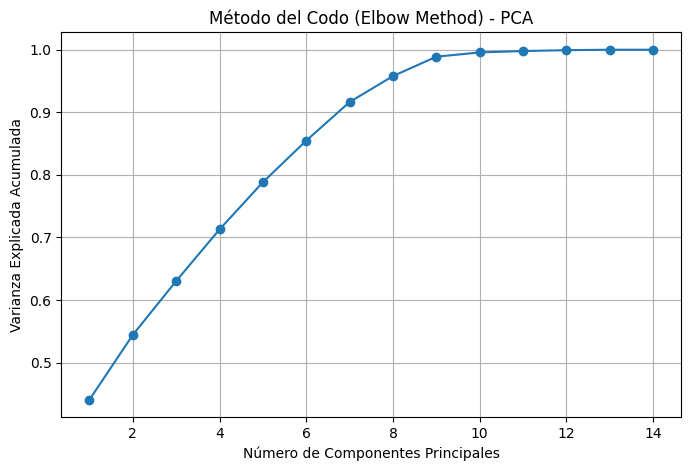

In [ ]:
X_scaled = StandardScaler().fit_transform(X_train)
pca = PCA()
pca.fit(X_scaled)
# 4) Calculamos la varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# 5) Graficamos el "método del codo"
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Método del Codo (Elbow Method) - PCA')
plt.grid(True)
plt.show()

In [ ]:
# definicion del primer pipeline no se si esta bien con el concepto de baseline 
pipeline_log = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=9)),
    ('rlg',LogisticRegression(max_iter=160))
])
pipeline_log.fit(X_train, y_train)

y_pred = pipeline_log.predict(X_test)
print(f" Acc={accuracy_score(y_test, y_pred):.3f}  F1={f1_score(y_test, y_pred,average='weighted'):.3f}")

 Acc=0.958  F1=0.958


<Figure size 600x600 with 0 Axes>

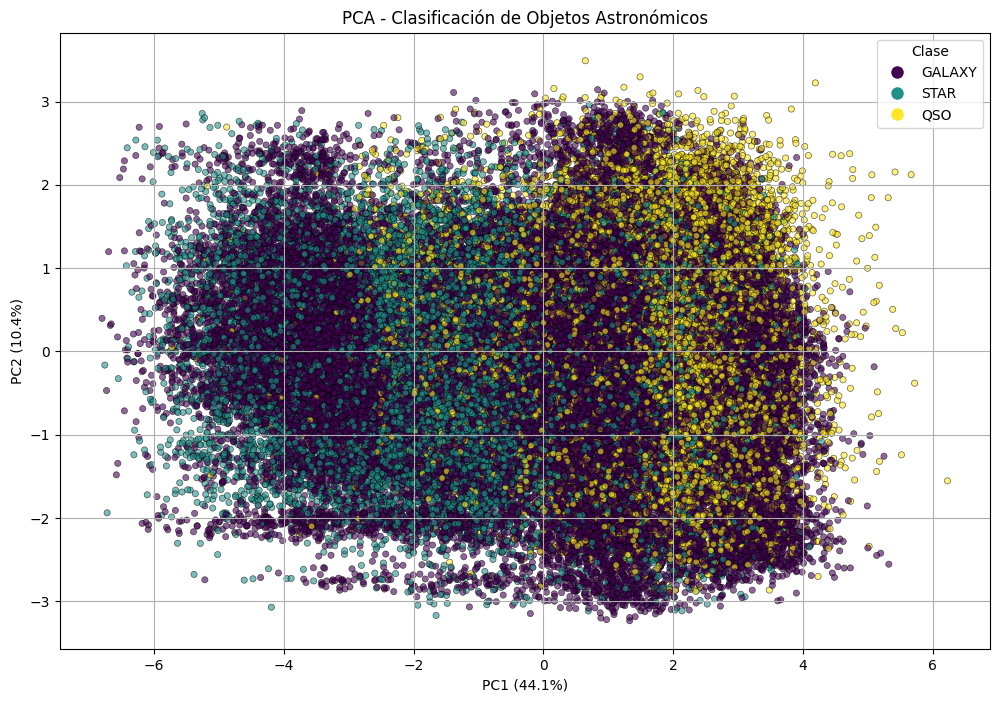

In [ ]:
# grafico pca
Z_train = pipeline_log.named_steps['pca'].transform(
        pipeline_log.named_steps['scaler'].transform(X_train)
)

plt.figure(figsize=(6,6))
class_colors = {'GALAXY': 0, 'STAR': 1, 'QSO': 2} 
y_encoded = y_train.map(class_colors)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(Z_train[:, 0], Z_train[:, 1], 
                     c=y_encoded, cmap='viridis', 
                     s=20, alpha=0.6, edgecolor='k', linewidth=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlabel(f'PC1 ({pipeline_log.named_steps["pca"].explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pipeline_log.named_steps["pca"].explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA - Clasificación de Objetos Astronómicos')
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                     markerfacecolor=plt.cm.viridis(class_colors[c]/2), 
                     markersize=10, label=c) 
          for c in class_colors.keys()]
plt.legend(handles=handles, title='Clase')
plt.grid(True)
plt.show()


In [ ]:
pipeline_rf = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=9)),
    ('rf',RandomForestClassifier())
])

pipeline_rf.fit(X_train,y_train)
y_pred = pipeline_rf.predict(X_test)
print(f" Acc={accuracy_score(y_test, y_pred):.3f}  F1={f1_score(y_test, y_pred,average='weighted'):.3f}")



 Acc=0.925  F1=0.925


#Observando el como se comportaron los datos al aplicar reduccion de dimensionalidad, encuentro que lo mejor es no utilizar pca ya que este hace que se pierda informacion